In [1]:
# Create code to generate 2x2 unitary matrices in Z7[i] from unit vectors

import numpy as np
from Imports.linalg_Zpi import linalg_Zpi
from Imports.numrange_Zpi import numrange_Zpi
from itertools import permutations

norm1 = np.load("Imports/norm1/p=7_n=2.npz")["norm1"]

In [2]:
linalg = linalg_Zpi(n=2, p=7)
indices = np.arange(len(norm1))

In [3]:
I = np.array([[complex(1,0), complex(0,0)],
              [complex(0,0), complex(1,0)]
             ])

In [4]:
mod = 7
size=2

p = list(permutations(indices, size))

In [5]:
for i in range(len(p)):
    tup = (norm1[p[i][0]], norm1[p[i][1]])
    u = np.hstack(tup)
    u_star = linalg.sim_a(np.conj(np.transpose(u)))
    
    if np.any(linalg.prod((u, u_star)) != I):
        p[i] = -1

In [6]:
p = [*set(p)]

In [7]:
p.remove(-1)

In [22]:
len(p)

42

In [8]:
for i in range(len(p)):
    tup = (norm1[p[i][0]], norm1[p[i][1]])
    u = np.hstack(tup)
    u_star = linalg.sim_a(np.conj(np.transpose(u)))
    print(u)
    print("----------")

[[0.+3.j 2.+3.j]
 [5.+3.j 0.+4.j]]
----------
[[1.+3.j 1.+2.j]
 [6.+2.j 1.+4.j]]
----------
[[2.+3.j 0.+3.j]
 [0.+3.j 2.+4.j]]
----------
[[0.+3.j 2.+3.j]
 [3.+5.j 1.+6.j]]
----------
[[1.+2.j 1.+3.j]
 [1.+3.j 1.+2.j]]
----------
[[1.+3.j 1.+2.j]
 [5.+1.j 4.+1.j]]
----------
[[0.+2.j 0.+2.j]
 [5.+0.j 2.+0.j]]
----------
[[0.+2.j 0.+2.j]
 [4.+4.j 3.+3.j]]
----------
[[0.+2.j 0.+2.j]
 [3.+3.j 4.+4.j]]
----------
[[0.+2.j 0.+2.j]
 [2.+0.j 5.+0.j]]
----------
[[0.+2.j 0.+2.j]
 [3.+4.j 4.+3.j]]
----------
[[2.+3.j 0.+3.j]
 [4.+0.j 3.+2.j]]
----------
[[0.+2.j 0.+2.j]
 [4.+3.j 3.+4.j]]
----------
[[0.+3.j 2.+3.j]
 [2.+4.j 0.+3.j]]
----------
[[1.+2.j 1.+3.j]
 [6.+3.j 1.+5.j]]
----------
[[1.+3.j 1.+2.j]
 [2.+1.j 4.+6.j]]
----------
[[2.+3.j 0.+3.j]
 [1.+6.j 3.+5.j]]
----------
[[1.+2.j 1.+3.j]
 [1.+4.j 6.+2.j]]
----------
[[2.+3.j 0.+3.j]
 [6.+1.j 4.+2.j]]
----------
[[0.+2.j 0.+2.j]
 [0.+5.j 0.+2.j]]
----------
[[0.+3.j 2.+3.j]
 [5.+4.j 6.+6.j]]
----------
[[1.+3.j 1.+2.j]
 [6.+5.j 6.+4.j]]

In [9]:
M = np.array([[complex(0,1), complex(0,1)],
              [complex(2,3), complex(2,4)]])

M_inv = linalg.inv(M)
eigvals = (complex(5,6), complex(5,5))
A = linalg.prod((M, np.diag(eigvals), M_inv))

A

array([[0.+2.j, 0.+6.j],
       [0.+1.j, 3.+2.j]])

In [10]:
B = linalg.prod((M, np.diag((complex(5,0), complex(5,4))), M_inv))

B

array([[4.+2.j, 0.+4.j],
       [0.+3.j, 6.+2.j]])

In [11]:
for i in range(len(p)):
    tup = (norm1[p[i][0]], norm1[p[i][1]])
    U = np.hstack(tup)
    U_star = linalg.sim_a(np.conj(np.transpose(U)))
    
    pred = linalg.prod((U_star, A, U))
    
    if np.all(pred==B):
        print(pred)
        print(B)
        print("----------")

In [24]:
count=0

for i in range(len(norm1)):
    x = norm1[i]
    for j in range(i, len(norm1)):
        y = linalg.sim_a(np.conj(np.transpose(norm1[j])))
        if linalg.prod((y,x)).item()==0:
            print(x,y)
            count+=1
            print(count)
            print("--------")
            print()

[[0.+0.j]
 [0.+1.j]] [[0.+6.j 0.+0.j]]
1
--------

[[0.+2.j]
 [0.+2.j]] [[0.+5.j 0.+2.j]]
2
--------

[[0.+2.j]
 [2.+0.j]] [[0.+5.j 5.+0.j]]
3
--------

[[0.+2.j]
 [3.+3.j]] [[0.+5.j 4.+3.j]]
4
--------

[[0.+2.j]
 [3.+4.j]] [[0.+5.j 4.+4.j]]
5
--------

[[0.+3.j]
 [2.+3.j]] [[2.+4.j 1.+6.j]]
6
--------

[[0.+3.j]
 [2.+4.j]] [[2.+4.j 0.+4.j]]
7
--------

[[0.+3.j]
 [3.+2.j]] [[2.+4.j 4.+0.j]]
8
--------

[[0.+3.j]
 [3.+5.j]] [[2.+4.j 1.+1.j]]
9
--------

[[0.+3.j]
 [4.+2.j]] [[2.+4.j 6.+6.j]]
10
--------

[[0.+3.j]
 [4.+5.j]] [[2.+4.j 3.+0.j]]
11
--------

[[0.+3.j]
 [5.+3.j]] [[2.+4.j 0.+3.j]]
12
--------

[[0.+3.j]
 [5.+4.j]] [[2.+4.j 6.+1.j]]
13
--------

[[1.+2.j]
 [1.+3.j]] [[1.+4.j 1.+5.j]]
14
--------

[[1.+2.j]
 [1.+4.j]] [[1.+4.j 6.+5.j]]
15
--------

[[1.+2.j]
 [3.+1.j]] [[1.+4.j 5.+1.j]]
16
--------

[[1.+2.j]
 [3.+6.j]] [[1.+4.j 2.+1.j]]
17
--------

[[1.+2.j]
 [4.+1.j]] [[1.+4.j 5.+6.j]]
18
--------

[[1.+2.j]
 [4.+6.j]] [[1.+4.j 2.+6.j]]
19
--------

[[1.+2.j]
 [6.+3.j]] 

array([0.+2.j, 1.+2.j, 2.+2.j, 3.+2.j, 4.+2.j, 5.+2.j, 6.+2.j],
      dtype=complex64)

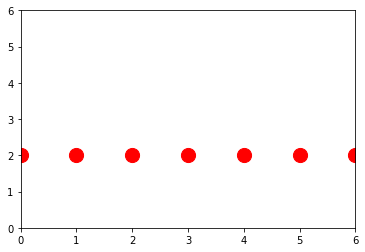

In [30]:
from Imports.numrange_Zpi import numrange_Zpi

numrange_Zpi(n=2, p=7, M=A).W1()

array([0.+2.j, 1.+2.j, 2.+2.j, 3.+2.j, 4.+2.j, 5.+2.j, 6.+2.j],
      dtype=complex64)

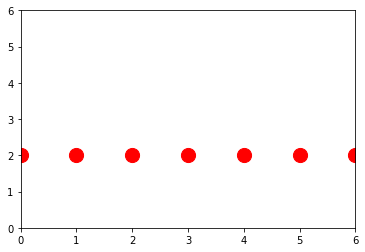

In [31]:
numrange_Zpi(n=2, p=7, M=B).W1()

In [32]:
A

array([[0.+2.j, 0.+6.j],
       [0.+1.j, 3.+2.j]])

In [33]:
tup = (norm1[p[14][0]], norm1[p[14][1]])
U = np.hstack(tup)
U_star = linalg.sim_a(np.conj(np.transpose(U)))

In [37]:
C = linalg.prod((U_star, A, U))

In [38]:
C

array([[5.+2.j, 2.+1.j],
       [2.+6.j, 5.+2.j]])

In [39]:
# Eigenvectors of A
M

array([[0.+1.j, 0.+1.j],
       [2.+3.j, 2.+4.j]])

In [40]:
# Eigenvectors of C
linalg.prod((U_star, M))

array([[2.+6.j, 5.+5.j],
       [6.+1.j, 4.+2.j]])

array([0.+2.j, 1.+2.j, 2.+2.j, 3.+2.j, 4.+2.j, 5.+2.j, 6.+2.j],
      dtype=complex64)

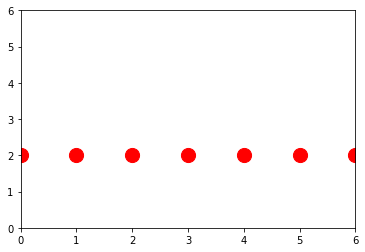

In [41]:
numrange_Zpi(n=2, p=7, M=C).W1()

In [43]:
linalg.mult(M[:,0], linalg.prod((U_star, M))[:,0])

In [44]:
linalg.mult(M[:,1], linalg.prod((U_star, M))[:,1])

In [45]:
def norm(v):
    return int(linalg.prod((np.conj(v.transpose()),v)).real.item())

In [50]:
hello = linalg.prod((U_star, M))[:,0]

In [58]:
hello2 = linalg.prod((U_star, M))[:,1]

In [56]:
norm(np.expand_dims(hello, axis=1))

0

In [60]:
norm(np.expand_dims(hello2, axis=1))

0

In [69]:
A_eigvec0 = np.expand_dims(M[:,0], axis=1)

In [70]:
A_eigvec1 = np.expand_dims(M[:,1], axis=1)

In [73]:
linalg.prod((np.conj(np.transpose(A_eigvec1)), A_eigvec0))

array([[3.+5.j]])